In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [41]:
df = pd.read_csv('weatherAUS.csv',usecols=['MinTemp','MaxTemp','Rainfall'])
df.head()

,MinTemp,MaxTemp,Rainfall
0,13.4,22.9,0.6
1,7.4,25.1,0.0
2,12.9,25.7,0.0
3,9.2,28.0,0.0
4,17.5,32.3,1.0


In [42]:
df.shape 

(145460, 3)

(array([3.3000e+02, 3.1340e+03, 1.2222e+04, 2.6784e+04, 3.5566e+04,
        3.0538e+04, 2.2422e+04, 1.1123e+04, 1.8360e+03, 2.0000e+01]),
 array([-8.500e+00, -4.260e+00, -2.000e-02,  4.220e+00,  8.460e+00,
         1.270e+01,  1.694e+01,  2.118e+01,  2.542e+01,  2.966e+01,
         3.390e+01]),
 <BarContainer object of 10 artists>)

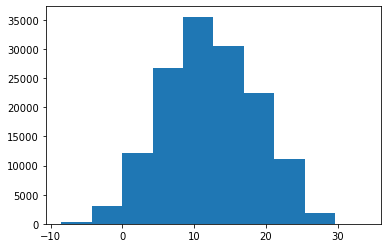

In [43]:
plt.hist(df['MinTemp'])


(array([  167.,   601.,  2332., 21972., 39813., 36018., 26277., 13113.,
         3583.,   323.]),
 array([-4.8 ,  0.49,  5.78, 11.07, 16.36, 21.65, 26.94, 32.23, 37.52,
        42.81, 48.1 ]),
 <BarContainer object of 10 artists>)

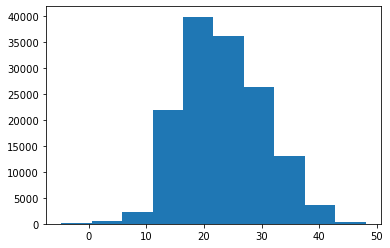

In [44]:
plt.hist(df['MaxTemp'])

(array([1.4075e+05, 1.1080e+03, 2.3600e+02, 5.9000e+01, 3.0000e+01,
        8.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0. ,  37.1,  74.2, 111.3, 148.4, 185.5, 222.6, 259.7, 296.8,
        333.9, 371. ]),
 <BarContainer object of 10 artists>)

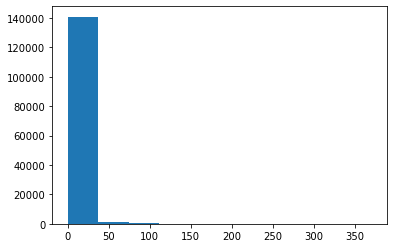

In [45]:
plt.hist(df['Rainfall'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

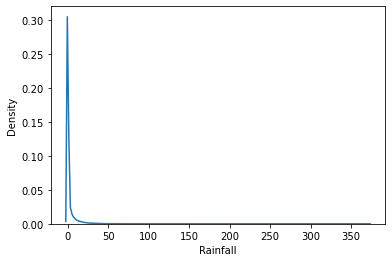

In [46]:
import seaborn as sns 
sns.kdeplot(df['Rainfall'])

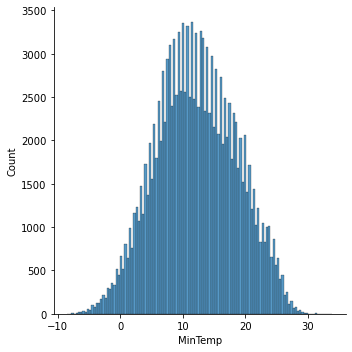

In [47]:
sns.displot(df['MinTemp'])

In [48]:
print("mean of MinTemp=",df['MinTemp'].mean())
print("std of MinTemp=",df['MinTemp'].std())
print("min of MinTemp=",df['MinTemp'].min())
print("max of MinTemp=",df['MinTemp'].max())

mean of MinTemp= 12.19403438096871
std of MinTemp= 6.398494975663306
min of MinTemp= -8.5
max of MinTemp= 33.9


In [49]:
# finding bundary values
print("Highest allowed value=",df['MinTemp'].mean()+3*df['MinTemp'].std())
print("Lowest allowed values =",df['MinTemp'].mean()-3*df['MinTemp'].std())

Highest allowed value= 31.38951930795863
Lowest allowed values = -7.001450546021211


In [50]:
# detect outliers
df[(df['MinTemp'] > 31.38) | (df['MinTemp'] < -7.00)]

,MinTemp,MaxTemp,Rainfall
46923,-8.0,15.1,0.2
47967,-7.6,13.8,0.2
49963,-8.2,15.2,0.0
52254,-8.5,0.6,1.0
52637,-8.0,2.1,NaN
52694,-7.1,-3.1,8.6
54043,-7.6,-1.4,5.8
54052,-7.5,-0.7,0.0
54410,-8.2,-0.8,0.0
54411,-7.2,-1.7,0.8


#### Trimmimg

In [51]:
ndf = df[(df['MinTemp'] < 31.38) | (df['MinTemp'] > -7.00)]

In [52]:
ndf 

,MinTemp,MaxTemp,Rainfall
0,13.4,22.9,0.6
1,7.4,25.1,0.0
2,12.9,25.7,0.0
3,9.2,28.0,0.0
4,17.5,32.3,1.0
...,...,...,...
145455,2.8,23.4,0.0
145456,3.6,25.3,0.0
145457,5.4,26.9,0.0
145458,7.8,27.0,0.0


In [53]:
####Approch -2


In [54]:
df['MinTemp_Z_score'] = (df['MinTemp'] -df['MinTemp'].mean())/df['MinTemp'].std()

In [55]:
df 

,MinTemp,MaxTemp,Rainfall,MinTemp_Z_score
0,13.4,22.9,0.6,0.188476
1,7.4,25.1,0.0,-0.749244
2,12.9,25.7,0.0,0.110333
3,9.2,28.0,0.0,-0.467928
4,17.5,32.3,1.0,0.829252
...,...,...,...,...
145455,2.8,23.4,0.0,-1.468163
145456,3.6,25.3,0.0,-1.343134
145457,5.4,26.9,0.0,-1.061818
145458,7.8,27.0,0.0,-0.686729


In [56]:
df['MinTemp_Z_score'].min()

-3.234203427474512

In [57]:
df['MinTemp_Z_score'].max() 

3.3923548743243517

In [58]:
df[df['MinTemp_Z_score'] > 3]

,MinTemp,MaxTemp,Rainfall,MinTemp_Z_score
72848,31.9,35.7,0.0,3.079781
96532,33.9,43.4,0.0,3.392355
99343,31.4,40.7,0.0,3.001638
105599,31.4,46.2,0.0,3.001638
107341,31.4,43.6,0.0,3.001638
108016,31.8,44.6,0.0,3.064153


In [59]:
df[df['MinTemp_Z_score'] < -3]

,MinTemp,MaxTemp,Rainfall,MinTemp_Z_score
46923,-8.0,15.1,0.2,-3.156060
47967,-7.6,13.8,0.2,-3.093545
49963,-8.2,15.2,0.0,-3.187317
52254,-8.5,0.6,1.0,-3.234203
52637,-8.0,2.1,NaN,-3.156060
52694,-7.1,-3.1,8.6,-3.015402
54043,-7.6,-1.4,5.8,-3.093545
54052,-7.5,-0.7,0.0,-3.077917
54410,-8.2,-0.8,0.0,-3.187317
54411,-7.2,-1.7,0.8,-3.031031


In [60]:
ndf2 = df[(df['MinTemp_Z_score'] < 3) |( df['MinTemp_Z_score'] >-3)]

In [61]:
ndf2

,MinTemp,MaxTemp,Rainfall,MinTemp_Z_score
0,13.4,22.9,0.6,0.188476
1,7.4,25.1,0.0,-0.749244
2,12.9,25.7,0.0,0.110333
3,9.2,28.0,0.0,-0.467928
4,17.5,32.3,1.0,0.829252
...,...,...,...,...
145455,2.8,23.4,0.0,-1.468163
145456,3.6,25.3,0.0,-1.343134
145457,5.4,26.9,0.0,-1.061818
145458,7.8,27.0,0.0,-0.686729


#### Capping

In [62]:
import numpy as np

In [63]:
upper_limit = df['MinTemp'].mean() + 3*df['MinTemp'].std()
lower_limit = df['MinTemp'].mean() - 3*df['MaxTemp'].std()

In [64]:
df['MinTemp'] = np.where(
    df['MinTemp'] > upper_limit,
    upper_limit,
    np.where(
        df['MinTemp'] < lower_limit,
        lower_limit,
        df['MinTemp']
    )
)

In [65]:
df 

,MinTemp,MaxTemp,Rainfall,MinTemp_Z_score
0,13.4,22.9,0.6,0.188476
1,7.4,25.1,0.0,-0.749244
2,12.9,25.7,0.0,0.110333
3,9.2,28.0,0.0,-0.467928
4,17.5,32.3,1.0,0.829252
...,...,...,...,...
145455,2.8,23.4,0.0,-1.468163
145456,3.6,25.3,0.0,-1.343134
145457,5.4,26.9,0.0,-1.061818
145458,7.8,27.0,0.0,-0.686729
